# Parts of Speech and Meaning (English Only)

In [1]:
t = "Cyprus, officially the Republic of Cyprus, is an island country in the Eastern Mediterranean and the third largest and third most populous island in the Mediterranean. Cyprus is located south of Turkey, west of Syria and Lebanon, northwest of Israel, north of Egypt, and southeast of Greece. Cyprus is a major tourist destination in the Mediterranean. With an advanced, high-income economy and a very high Human Development Index, the Republic of Cyprus has been a member of the Commonwealth since 1961 and was a founding member of the Non-Aligned Movement until it joined the European Union on 1 May 2004. On 1 January 2008, the Republic of Cyprus joined the eurozone."

## 1. Tokenization

In [2]:
from nltk import sent_tokenize, word_tokenize
sentences = sent_tokenize(t.lower())
sentences

['cyprus, officially the republic of cyprus, is an island country in the eastern mediterranean and the third largest and third most populous island in the mediterranean.',
 'cyprus is located south of turkey, west of syria and lebanon, northwest of israel, north of egypt, and southeast of greece.',
 'cyprus is a major tourist destination in the mediterranean.',
 'with an advanced, high-income economy and a very high human development index, the republic of cyprus has been a member of the commonwealth since 1961 and was a founding member of the non-aligned movement until it joined the european union on 1 may 2004. on 1 january 2008, the republic of cyprus joined the eurozone.']

In [3]:
tokens = word_tokenize(sentences[2])
tokens

['cyprus',
 'is',
 'a',
 'major',
 'tourist',
 'destination',
 'in',
 'the',
 'mediterranean',
 '.']

## 2. POS Tagging

In [5]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('cyprus', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('major', 'JJ'),
 ('tourist', 'NN'),
 ('destination', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mediterranean', 'NN'),
 ('.', '.')]

To access documentation for tags, for example for `NN`:

In [7]:
import nltk.help
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


## 3. Word senses (for homonyms)

WordNet is a lexical database for the English language in the form of a semantic graph. 

WordNet groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members.

NLTK provides an interface to the WordNet API.

In [8]:
from nltk.corpus import wordnet as wn
wn.synsets('human')

[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

In [9]:
wn.synsets('human')[0].definition()

'any living or extinct member of the family Hominidae characterized by superior intelligence, articulate speech, and erect carriage'

In [10]:
wn.synsets('human')[1].definition()

'characteristic of humanity'

In [11]:
human = wn.synsets('Human', pos=wn.NOUN)[0]
human

Synset('homo.n.02')

In [12]:
human.hypernyms() # A hypernym is a word with a broad meaning constituting a category into which words with more specific meanings fall; a superordinate. For example, colour is a hypernym of red.

[Synset('hominid.n.01')]

In [13]:
human.hyponyms()

[Synset('homo_soloensis.n.01'),
 Synset('homo_habilis.n.01'),
 Synset('world.n.08'),
 Synset('homo_sapiens.n.01'),
 Synset('neandertal_man.n.01'),
 Synset('homo_erectus.n.01'),
 Synset('rhodesian_man.n.01')]

In [14]:
bike = wn.synsets('bicycle')[0]
bike

Synset('bicycle.n.01')

In [15]:
girl = wn.synsets('girl')[1]
girl

Synset('female_child.n.01')

In [16]:
bike.wup_similarity(human) # The Wu-Palmer metric (WUP) is a measure of similarity based on distance in the graph. There are many other metrics too.

0.34782608695652173

In [17]:
girl.wup_similarity(human)

0.5217391304347826

In [18]:
synonyms = []
for syn in wn.synsets('girl'):
    for lemma in syn.lemmas(): #  A lemma is basically the dictionary form or base form of a word, as opposed to the various inflected forms of a word.
        synonyms.append(lemma.name())
synonyms

['girl',
 'miss',
 'missy',
 'young_lady',
 'young_woman',
 'fille',
 'female_child',
 'girl',
 'little_girl',
 'daughter',
 'girl',
 'girlfriend',
 'girl',
 'lady_friend',
 'girl']

In [19]:
antonyms = []
for syn in wn.synsets("girl"):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
antonyms

['male_child', 'boy', 'son', 'boy']

## 4. Chunking and Entity Recognition

The goal of chunking is to divide a sentence into chunks. Usually each chunk contains a **head** and optionally additionally words and modifiers. Examples of chunks include noun groups and verb groups.

### 4.1. Chunking

In [20]:
from nltk.chunk import RegexpParser

In order to create a chunker, we need to first define a **chunk grammar**, consisting of rules that indicate how sentences should be chunked. 

We can define a simple grammar for a noun phrase (NP) chunker with a single regular-expression rule. This rule says that an NP chunk should be formed whenever the chunker finds an optional determiner (`DT`) followed by any number of adjectives (`JJ`) and then a noun (`NN`).

Note how grammatical structures which are not noun phrases are not chunked, which is totally fine:

In [21]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

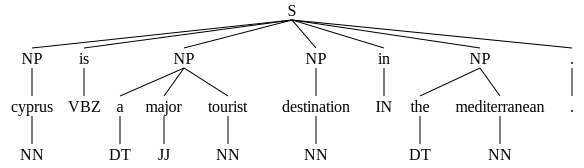

In [23]:
chunker = RegexpParser(grammar)
result = chunker.parse(tags)
result

### 4.2. Entity Recognition

The goal of entity recogintion is to detect entities such as Person, Location, Time, etc.

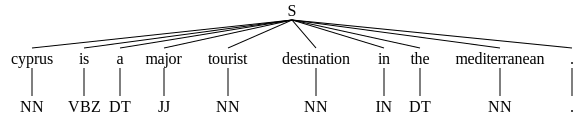

In [25]:
from nltk.chunk import ne_chunk # ne = named entity
ne_chunk(tags)

Note `ne_chunk` was unable to detect any entities in our sentence. That is because it is quite limited, being able to recognize only the following entities: 
> FACILITY, GPE (Geo-Political Entity), GSP (Geo-Socio-Political group), LOCATION, ORGANIZATION, PERSON 